In [1]:
import pandas as pd
from scipy import stats
import numpy as np
from arch.unitroot import PhillipsPerron
import matplotlib.pyplot as plt
import yfinance as yf

plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.family': 'Times New Roman'})
plt.rcParams.update({'axes.grid': True, 'axes.linewidth': 0.5, 'axes.edgecolor': 'black'})

%load_ext autoreload
%autoreload 2

In [2]:
tickers = pd.read_csv('../data/nse_tickers.csv')

In [3]:
data = yf.download(
        tickers = tickers.Symbol.tolist(),
        interval = '1h',
        period = '2y',
        )['Adj Close']

data = data.ffill()
data.drop(['MM.NS'], axis=1, inplace = True)

[*********************100%***********************]  30 of 30 completed

1 Failed download:
- MM.NS: No data found, symbol may be delisted


In [4]:
def multivariate_stationarity(series):

    statistic = []
    pvalue = []

    for col in series.columns:
        result = PhillipsPerron(series[col])
        statistic.append(result.stat)
        pvalue.append(result.pvalue)

    return pd.DataFrame(data = {'statistic': statistic, 'pvalue': pvalue}, index = series.columns)

print(multivariate_stationarity(data))

               statistic    pvalue
ADANIENT.NS    -1.458837  0.553767
APOLLOHOSP.NS  -2.645514  0.083950
BAJAJ-AUTO.NS  -1.970019  0.299871
BAJAJFINSV.NS  -0.977206  0.761487
BAJFINANCE.NS  -2.750545  0.065693
BHARTIARTL.NS  -2.091618  0.247898
BRITANNIA.NS   -1.100271  0.714964
CIPLA.NS       -1.947603  0.310009
COALINDIA.NS   -1.563860  0.501718
HDFCLIFE.NS    -1.590234  0.488497
HEROMOTOCO.NS  -2.495137  0.116662
HINDALCO.NS    -2.294378  0.173787
ICICIBANK.NS   -1.729711  0.415873
INDUSINDBK.NS  -2.282848  0.177559
ITC.NS          0.484547  0.984396
KOTAKBANK.NS   -2.981205  0.036687
LT.NS          -1.659388  0.452149
MARUTI.NS      -2.290908  0.174917
NESTLEIND.NS   -2.301124  0.171606
NTPC.NS        -1.729023  0.416224
ONGC.NS        -2.442245  0.130166
RELIANCE.NS    -2.863679  0.049738
TATACONSUM.NS  -2.650525  0.082998
TATASTEEL.NS   -2.516048  0.111618
TCS.NS         -2.089123  0.248911
TECHM.NS       -1.309096  0.625001
TITAN.NS       -2.268611  0.182291
ULTRACEMCO.NS  -2.03

In [5]:
data_pct_change = data.pct_change().dropna() * 100
print(multivariate_stationarity(data_pct_change))

               statistic  pvalue
ADANIENT.NS   -57.140438     0.0
APOLLOHOSP.NS -56.664001     0.0
BAJAJ-AUTO.NS -58.859832     0.0
BAJAJFINSV.NS -58.039597     0.0
BAJFINANCE.NS -58.418003     0.0
BHARTIARTL.NS -58.766064     0.0
BRITANNIA.NS  -61.098129     0.0
CIPLA.NS      -61.129535     0.0
COALINDIA.NS  -58.393854     0.0
HDFCLIFE.NS   -57.732094     0.0
HEROMOTOCO.NS -58.287038     0.0
HINDALCO.NS   -57.632268     0.0
ICICIBANK.NS  -58.412736     0.0
INDUSINDBK.NS -58.685061     0.0
ITC.NS        -61.584471     0.0
KOTAKBANK.NS  -59.437276     0.0
LT.NS         -59.117635     0.0
MARUTI.NS     -57.336102     0.0
NESTLEIND.NS  -61.885321     0.0
NTPC.NS       -60.299558     0.0
ONGC.NS       -60.174569     0.0
RELIANCE.NS   -59.418322     0.0
TATACONSUM.NS -59.376203     0.0
TATASTEEL.NS  -57.411676     0.0
TCS.NS        -59.405376     0.0
TECHM.NS      -58.810423     0.0
TITAN.NS      -58.467418     0.0
ULTRACEMCO.NS -59.426301     0.0
WIPRO.NS      -59.081027     0.0


<Axes: ylabel='Density'>

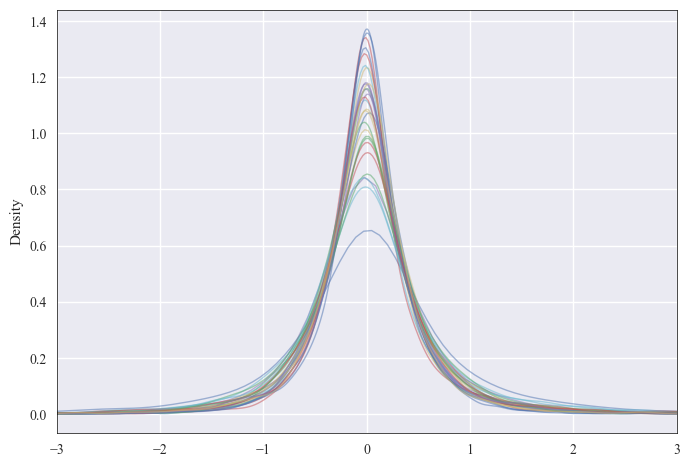

In [6]:
import seaborn as sns

data_pct_change.plot(kind = 'density', alpha = 0.5, linewidth = 1, legend = False, xlim = (-3, 3))
# sns.kdeplot(data = df_premiums, x = 'Premium Adult Individual Age 21', hue = 'Time Trend', ax=ax[2], fill=True,
#    alpha=.5, linewidth=0);

In [9]:
data.to_csv('../data/price_data.csv')